In [16]:
from RBF_Net import RBF_Net
import math
import numpy as np
import matplotlib.pyplot as plt

In [17]:
X_train = np.arange(0, 2*math.pi, 0.1)
X_train = X_train.reshape(1, X_train.shape[0])

X_test = np.arange(0.05, 2*math.pi, 0.1)
X_test = X_test.reshape(1, X_test.shape[0])

In [18]:
def sin_2(x):
    return np.sin(2*x)

In [19]:
def square(x):
    arr = np.zeros(x.shape)
    for i in range(arr.shape[0]):
        if np.sin(x[i]) >= 0:
            arr[i] = 1
        else:
            arr[i] = -1
    return arr

In [20]:
f_train = sin_2(X_train)
f_test = sin_2(X_test)

Number of nodes: 1, Error: 0.5700164614945218
Number of nodes: 2, Error: 0.5053704490266551
Number of nodes: 3, Error: 0.5054840359406021
Number of nodes: 4, Error: 0.38109852076837347
Number of nodes: 5, Error: 0.4390091604940275
Number of nodes: 6, Error: 0.0714816221093025
Number of nodes: 7, Error: 0.036163698296211334
Number of nodes: 8, Error: 0.010492746164593636
Number of nodes: 9, Error: 0.008406063356286061
Number of nodes: 10, Error: 0.0014598133929936924
Number of nodes: 11, Error: 0.001090883359391736
Number of nodes: 12, Error: 0.00011941225797053368
Number of nodes: 13, Error: 4.412667408617867e-05
Number of nodes: 14, Error: 4.677355038346682e-05
Number of nodes: 15, Error: 0.00023296961025228398
Number of nodes: 16, Error: 0.00011842576645030506
Number of nodes: 17, Error: 0.00010097551133798227
Number of nodes: 18, Error: 0.00023558536745277336
Number of nodes: 19, Error: 0.00016492471356641675
Number of nodes: 20, Error: 0.00011147415436788396
Number of nodes: 21, Er

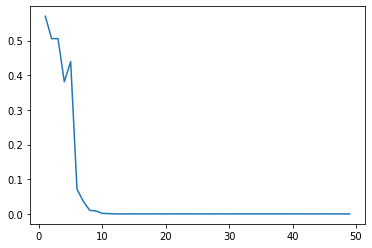

In [6]:
dim_list = list(range(1, 50))
errors = []
for H_dim in dim_list:
    rbf_net = RBF_Net(X_train, f_train.T, H_dim, weight_learn = 'ls', CL = False)
    rbf_net.train()
    f_approx = rbf_net.predict(X_test).flatten()
    test_error = np.mean(np.abs(f_approx - f_test))
    errors.append(test_error)
    print("Number of nodes: {}, Error: {}".format(H_dim, test_error))
plt.plot(dim_list, errors)

Text(0.5, 1.0, 'Sine function')

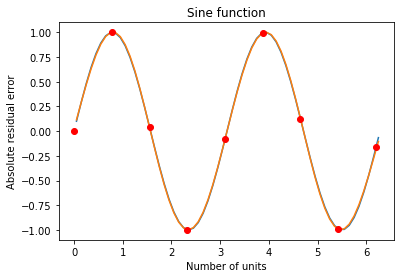

In [7]:
rbf_net = RBF_Net(X_train, f_train.T, 9, weight_learn = 'ls', CL = False)
rbf_net.train()
f_approx = rbf_net.predict(X_test).flatten()
plt.plot(X_test[0], f_test[0])
plt.plot(X_test[0], f_approx)
plt.plot(rbf_net.mus, sin_2(rbf_net.mus), 'bo', color = 'r')
plt.xlabel("Number of units")
plt.ylabel("Absolute residual error")
plt.title("Sine function")

In [8]:
f_sq_train = square(X_train[0])
f_sq_test = square(X_test[0])

Number of nodes: 1, Error: 0.7893254646797947
Number of nodes: 2, Error: 0.5688364073335818
Number of nodes: 3, Error: 0.5689856598145107
Number of nodes: 4, Error: 0.19170168268422064
Number of nodes: 5, Error: 0.2558888873820278
Number of nodes: 6, Error: 0.16030464068586767
Number of nodes: 7, Error: 0.1689683995996721
Number of nodes: 8, Error: 0.14463341659970116
Number of nodes: 9, Error: 0.14761278043977494
Number of nodes: 10, Error: 0.1228014370056554
Number of nodes: 11, Error: 0.12488620953532846
Number of nodes: 12, Error: 0.11113578181720284
Number of nodes: 13, Error: 0.11242652096594166
Number of nodes: 14, Error: 0.10132555778057842
Number of nodes: 15, Error: 0.10292513137260863
Number of nodes: 16, Error: 0.10324385925229315
Number of nodes: 17, Error: 0.1033713444810726
Number of nodes: 18, Error: 0.10346373151059385
Number of nodes: 19, Error: 0.10357327453949972
Number of nodes: 20, Error: 0.10364193510747374
Number of nodes: 21, Error: 0.10370098433059101
Number o

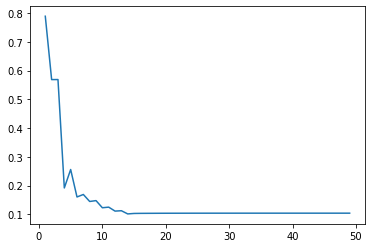

In [13]:
dim_list = list(range(1, 50))
errors = []
for H_dim in dim_list:
    rbf_net = RBF_Net(X_train, f_sq_train.T, H_dim, weight_learn = 'ls', CL = False)
    rbf_net.train()
    f_sq_approx = rbf_net.predict(X_test).flatten()
    test_error = np.mean(np.abs(f_sq_approx - f_sq_test))
    errors.append(test_error)
    print("Number of nodes: {}, Error: {}".format(H_dim, test_error))
plt.plot(dim_list, errors)

Text(0.5, 1.0, 'Square function')

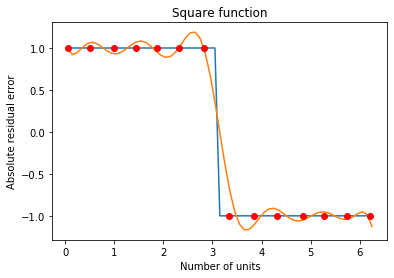

In [15]:
rbf_net = RBF_Net(X_train, f_sq_train.T, 14)
rbf_net.train()
f_sq_approx = rbf_net.predict(X_test).flatten()
plt.plot(X_test[0], f_sq_test)
plt.plot(X_test[0], f_sq_approx)
plt.plot(rbf_net.mus, square(rbf_net.mus), 'bo', color = 'r')
plt.xlabel("Number of units")
plt.ylabel("Absolute residual error")
plt.title("Square function")

To obtain zero error for the square function, we can transform the output with the sign function. When we use an even number of nodes, we get the lowest error. 